In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg 


Extracting Data from Zip file

In [2]:
from zipfile import ZipFile

data_path = 'archive.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


Data Visualization

In [3]:
# it will show how many classes we have i.e, cats and dogs
path = 'dog-vs-cat'
classes = os.listdir(path)
classes

['cat', 'dog']

Displaying grid images of cats and dogs from the dataset

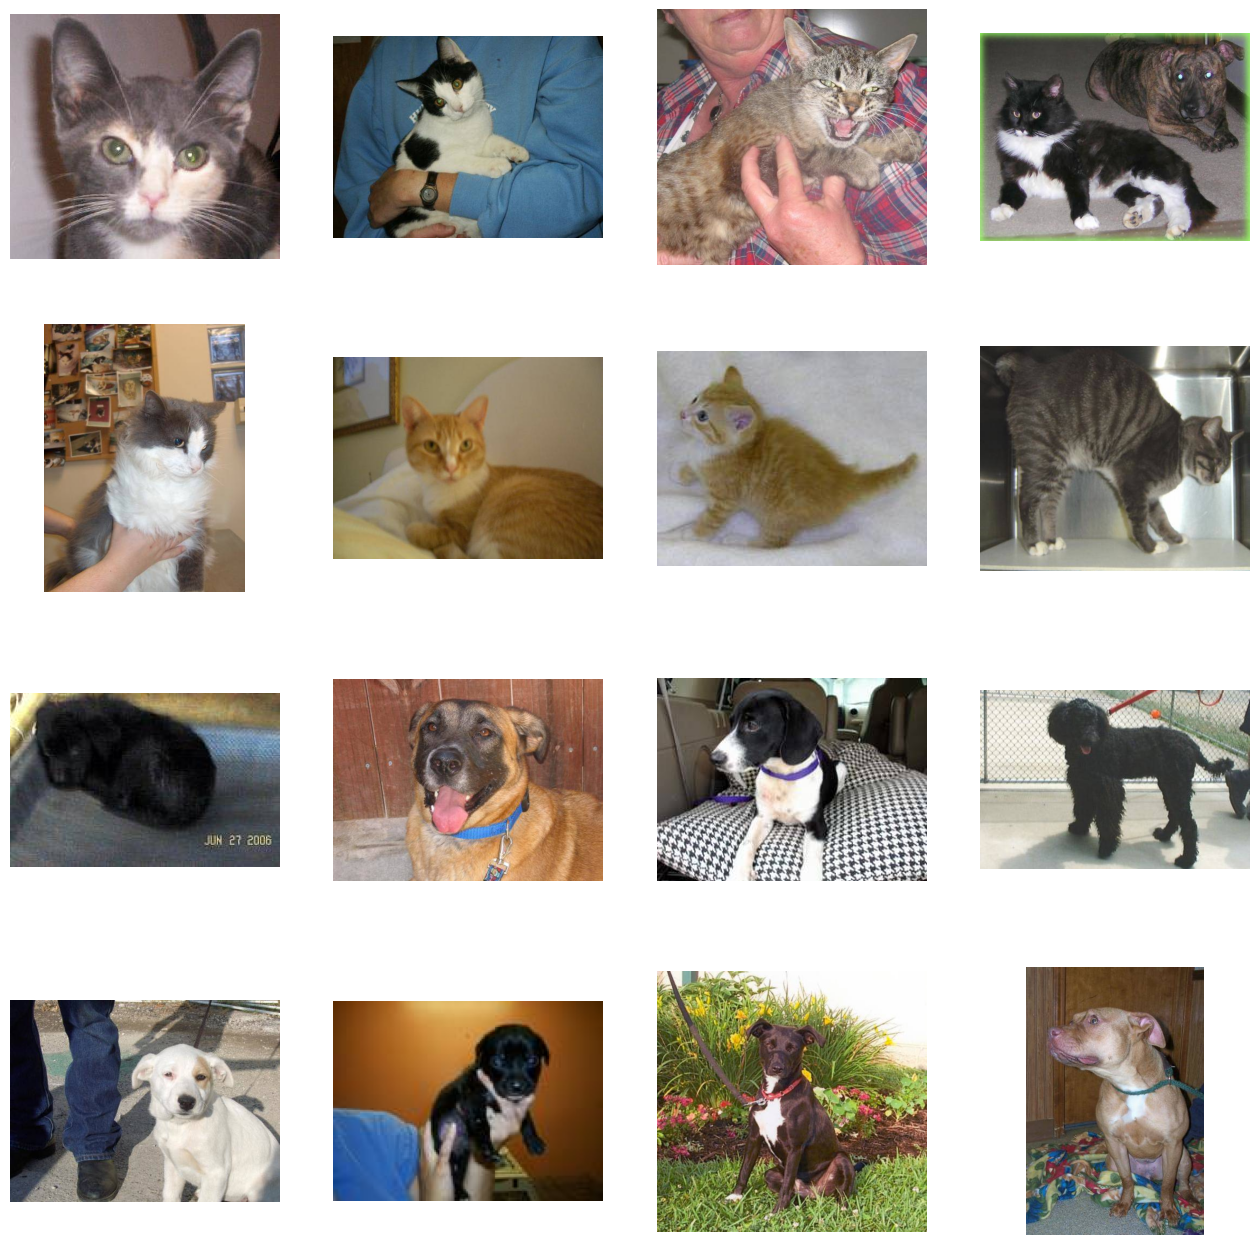

In [4]:
fig = plt.gcf()  #gcf: get current figure
fig.set_size_inches(16, 16)

cat_dir = os.path.join('dog-vs-cat/cat')
dog_dir = os.path.join('dog-vs-cat/dog')

# get list of all image filenames in both directories
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210  # set an index to select range of images

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

Data Preparation for Training

In [5]:
base_dir = 'dog-vs-cat'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir, 
                                            image_size=(200,200),
                                            subset='training',
                                            seed = 1,  # ensure consistent random shuffling
                                            validation_split=0.1,  # 10% data for validation (testing)
                                            batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                            image_size=(200,200),
                                            subset='validation',  # load validation images (10%)
                                            seed = 1,
                                            validation_split=0.1,
                                            batch_size= 32)

# the data is splitted in 90% training and 10% testing set


Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


Building CNN

In [6]:
cnn=Sequential()

STEP1: Convolution

In [7]:
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(200,200,3)))

STEP2: Pooling

In [8]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

STEP3: Adding second convolutional layer

In [9]:
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

STEP4: Adding third convolutional layer

In [10]:
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

STEP5: Adding forth convolutional layer

In [11]:
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

STEP6: Flattening

In [12]:
cnn.add(Flatten())

STEP6: Full Connection

In [13]:
cnn.add(Dense(units=512, activation='relu'))
cnn.add(BatchNormalization())

In [14]:
cnn.add(Dense(units=512, activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(BatchNormalization())

In [15]:
cnn.add(Dense(units=512, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())

STEP7: Output Layer

In [16]:
cnn.add(Dense(units=1, activation='sigmoid'))
# we are doing binary classification to identify cat and dog, so the output layer only needs 1 neuron

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,199,521 (8.39 MB)

 Trainable params: 2,196,449 (8.38 MB)

 Non-trainable params: 3,072 (12.00 KB)

Training CNN

In [18]:
# compiling CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the CNN on training set and evaluating it on Test set

In [19]:
history = cnn.fit(train_datagen, epochs=20, validation_data=test_datagen)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 586s 815ms/step - accuracy: 0.5828 - loss: 0.7524 - val_accuracy: 0.6976 - val_loss: 0.6785
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 193s 273ms/step - accuracy: 0.7032 - loss: 0.5717 - val_accuracy: 0.7560 - val_loss: 0.5097
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 221s 314ms/step - accuracy: 0.7742 - loss: 0.4772 - val_accuracy: 0.7920 - val_loss: 0.4738
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 722s 1s/step - accuracy: 0.8105 - loss: 0.4145 - val_accuracy: 0.7140 - val_loss: 0.6151
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 628s 892ms/step - accuracy: 0.8419 - loss: 0.3608 - val_accuracy: 0.8128 - val_loss: 0.4269
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 310s 440ms/step - accuracy: 0.8568 - loss: 0.3281 - val_accuracy: 0.8064 - val_loss: 0.4951
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 185s 263ms/step - accuracy: 0.8481 - loss: 0.3488 - val_accuracy: 0.6504 - val_loss: 0.9794
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 474s 674ms/step - accuracy: 0.8794 - lo

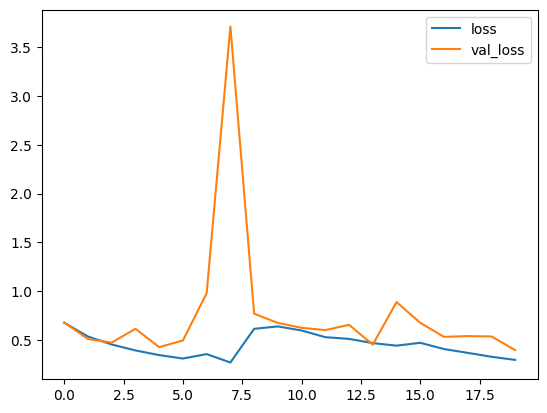

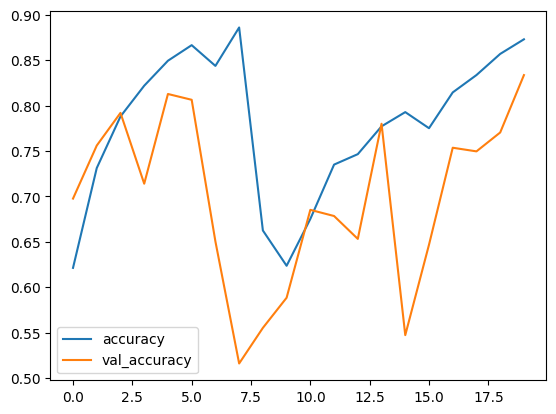

In [20]:
#visualize training history
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

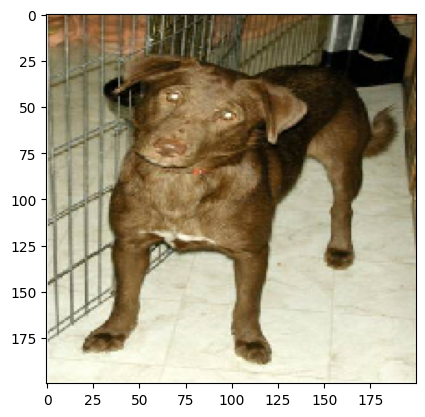

In [21]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('dog-vs-cat/dog/dog.1.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)

In [22]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

In [23]:
# Result array
result = cnn.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Dog
